# Basic library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")



pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


# Import the data set

In [2]:
bank = pd.read_csv("Bank-data.csv")
bank

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,no
1,1,0.767,0,0,1,274,yes
2,2,4.858,0,1,0,167,no
3,3,4.120,0,0,0,686,yes
4,4,4.856,0,1,0,159,no
5,5,0.899,0,0,0,120,no
6,6,4.962,0,0,0,337,no
7,7,4.858,0,1,0,640,no
8,8,4.962,0,0,0,663,yes
9,9,4.865,0,0,0,403,no


In [3]:
#Checking for null values
bank.isnull().sum()

Index            0
interest_rate    0
credit           0
Gender           0
previous         0
duration         0
Churn            0
dtype: int64

No null values present

In [4]:
bank.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          518 non-null    int64  
 1   interest_rate  518 non-null    float64
 2   credit         518 non-null    int64  
 3   Gender         518 non-null    int64  
 4   previous       518 non-null    int64  
 5   duration       518 non-null    int64  
 6   Churn          518 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 28.5+ KB


Here we see that 'Churn' is our dependent variable and it is in the object format so we need to encode this

In [5]:
bank=bank.drop(['Index'],axis=1)  #Index is not required in the data so we need to drop it 

In [6]:
bank.duplicated().sum()   # Checking for the duplicate values 

5

In [7]:
bank=bank.drop_duplicates() # Drop the duplicate values

In [8]:
bank.duplicated().sum()

0

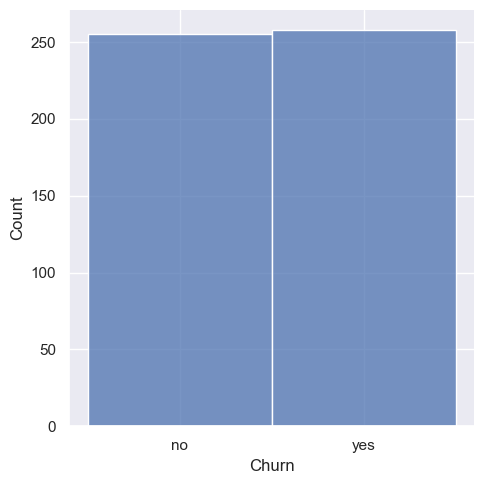

In [9]:
sns.displot(x='Churn',data=bank)

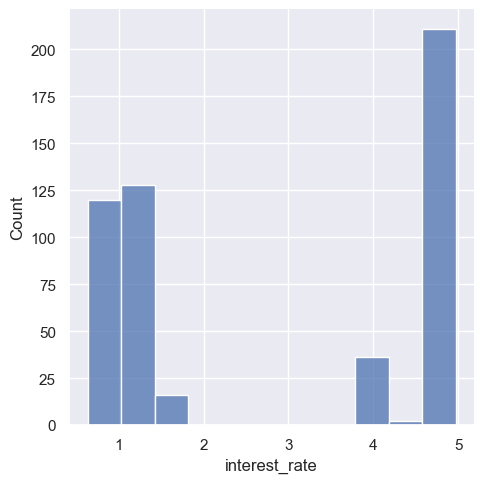

In [10]:
sns.displot(x='interest_rate',data=bank)

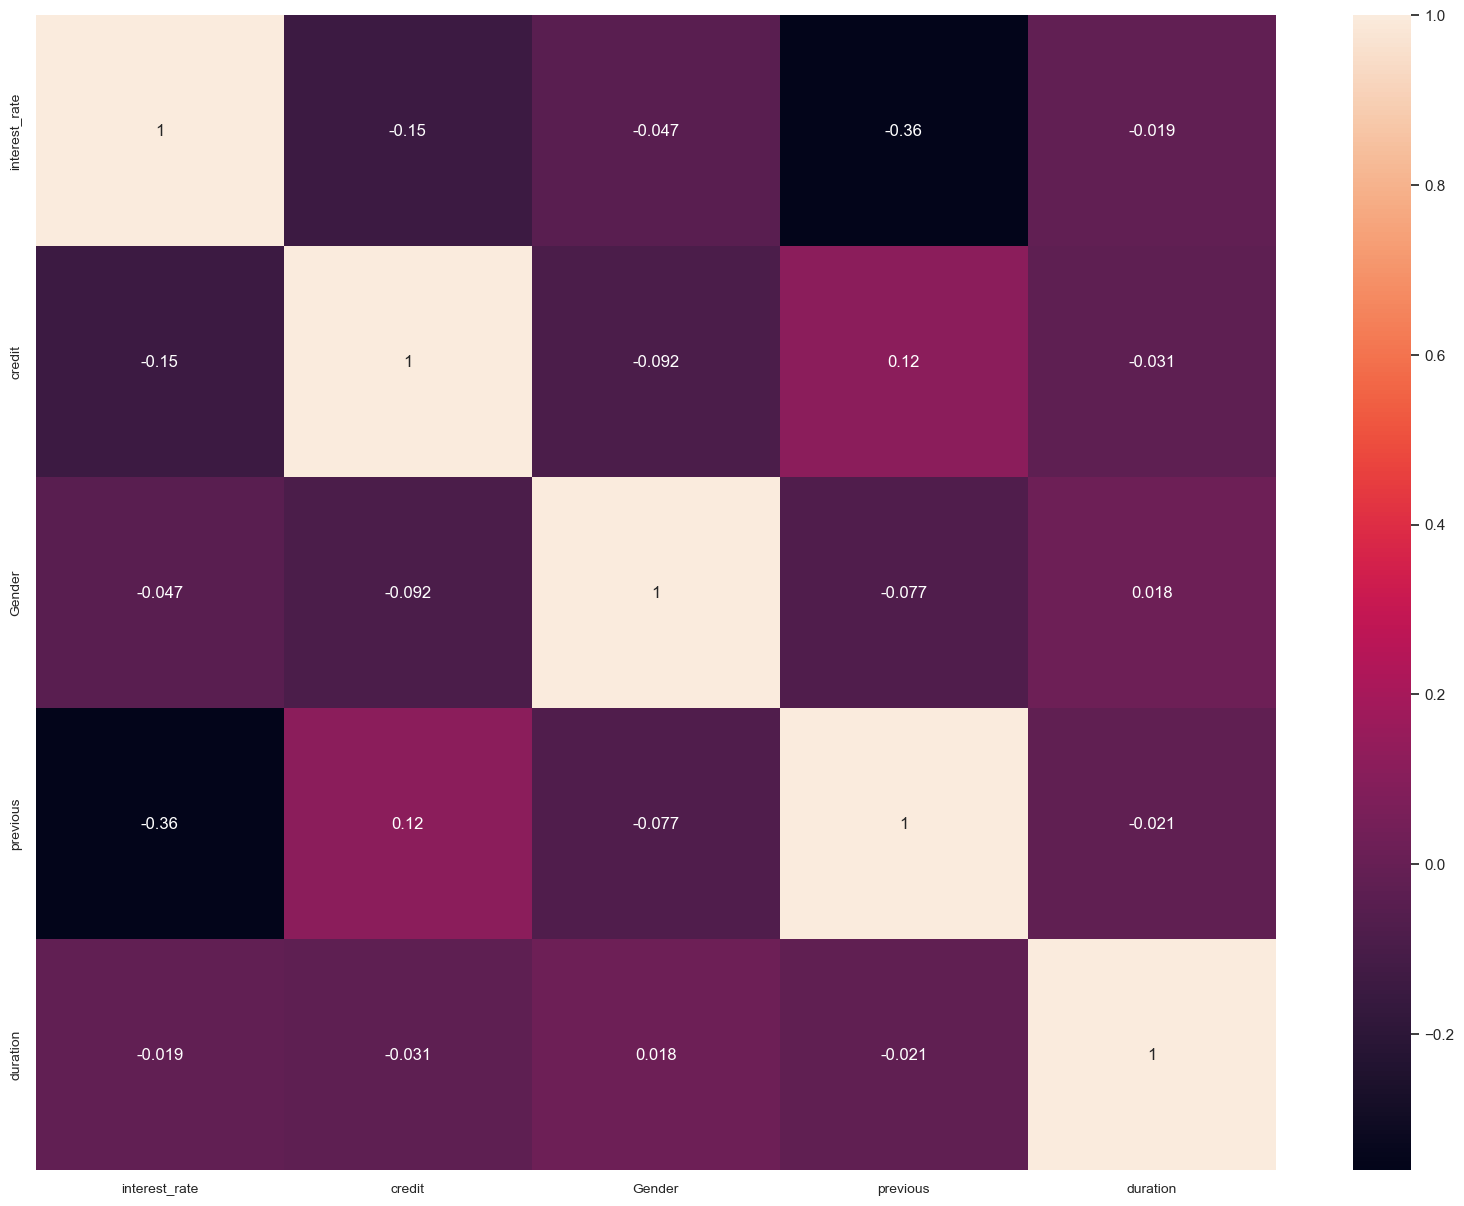

In [11]:
corr = bank.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
bank.corr()  # reporting correlation matrix

,interest_rate,credit,Gender,previous,duration
interest_rate,1.000000,-0.145202,-0.046880,-0.360823,-0.018599
credit,-0.145202,1.000000,-0.092417,0.116573,-0.030960
Gender,-0.046880,-0.092417,1.000000,-0.077064,0.017958
previous,-0.360823,0.116573,-0.077064,1.000000,-0.020781
duration,-0.018599,-0.030960,0.017958,-0.020781,1.000000


In [13]:
bank['interest_rate'].unique()

array([1.334, 0.767, 4.858, 4.12 , 4.856, 0.899, 4.962, 4.865, 1.365,
       4.965, 1.244, 1.26 , 4.864, 4.86 , 1.327, 4.076, 1.811, 1.266,
       4.592, 0.739, 4.963, 4.857, 0.884, 1.313, 1.281, 0.704, 4.964,
       4.957, 0.683, 0.715, 1.483, 0.682, 1.   , 4.97 , 4.968, 4.921,
       1.04 , 0.81 , 0.635, 0.742, 1.25 , 4.859, 4.961, 0.706, 0.73 ,
       0.74 , 4.021, 0.722, 0.773, 0.883, 4.958, 0.854, 0.851, 1.016,
       1.405, 1.268, 0.723, 0.668, 4.855, 1.726, 1.291, 4.153, 4.96 ,
       1.27 , 0.977, 1.344, 1.602, 1.406, 0.677, 0.881, 4.966, 0.748,
       1.072, 0.652, 1.299, 4.191, 1.799, 4.967, 0.835, 1.262, 0.879,
       4.794, 4.959, 0.644, 0.896, 0.882, 1.687, 0.79 , 0.639, 0.699,
       1.05 , 1.423, 1.41 , 0.771, 0.898, 0.878, 1.029, 1.757, 1.614,
       0.889, 1.354, 1.531, 0.87 , 0.717, 1.028, 0.655, 1.453, 1.392,
       0.904, 1.264, 4.955, 0.849, 0.846, 0.959, 0.697, 0.714, 0.797,
       0.716, 0.649, 0.827, 1.048, 1.479, 0.72 , 1.498, 4.866, 1.52 ,
       0.728, 1.03 ,

In [14]:
# Import label encoder 
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Churn'. 
bank['Churn']= label_encoder.fit_transform(bank['Churn']) 
  
bank['Churn'].unique()

array([0, 1])

In [15]:
bank.head()

,interest_rate,credit,Gender,previous,duration,Churn
0,1.334,0,1,0,117,0
1,0.767,0,0,1,274,1
2,4.858,0,1,0,167,0
3,4.120,0,0,0,686,1
4,4.856,0,1,0,159,0


In [16]:
bank.describe()

,interest_rate,credit,Gender,previous,duration,Churn
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,2.887121,0.035088,0.270955,0.128655,386.430799,0.502924
std,1.879558,0.184181,0.444887,0.335144,344.489375,0.500479
min,0.635000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.050000,0.000000,0.000000,0.000000,158.000000,0.000000
50%,1.602000,0.000000,0.000000,0.000000,272.000000,1.000000
75%,4.957000,0.000000,1.000000,0.000000,491.000000,1.000000
max,4.970000,1.000000,1.000000,1.000000,2653.000000,1.000000


In [17]:
bank.head(20)

,interest_rate,credit,Gender,previous,duration,Churn
0,1.334,0,1,0,117,0
1,0.767,0,0,1,274,1
2,4.858,0,1,0,167,0
3,4.120,0,0,0,686,1
4,4.856,0,1,0,159,0
5,0.899,0,0,0,120,0
6,4.962,0,0,0,337,0
7,4.858,0,1,0,640,0
8,4.962,0,0,0,663,1
9,4.865,0,0,0,403,0


# Spliting the data into dependent variable and independent variable 

In [18]:
x=bank.iloc[:,0:-1]    # Independent variables 

In [19]:
x

,interest_rate,credit,Gender,previous,duration
0,1.334,0,1,0,117
1,0.767,0,0,1,274
2,4.858,0,1,0,167
3,4.120,0,0,0,686
4,4.856,0,1,0,159
5,0.899,0,0,0,120
6,4.962,0,0,0,337
7,4.858,0,1,0,640
8,4.962,0,0,0,663
9,4.865,0,0,0,403


In [20]:
x.shape

(513, 5)

In [21]:
y=bank['Churn']  # Dependent variable 

In [22]:
y.shape

(513,)

In [23]:
y

0      0
1      1
2      0
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     1
12     1
13     0
14     0
15     1
16     1
17     1
18     1
19     0
20     1
21     1
22     0
24     1
25     0
26     1
27     1
28     1
29     0
30     0
31     0
32     1
33     1
34     0
35     0
36     1
37     0
38     1
39     0
40     0
41     1
42     0
43     0
44     1
45     1
46     0
47     0
48     0
49     1
50     0
51     0
52     0
53     0
54     0
55     1
56     0
57     1
58     1
59     1
60     0
61     0
62     1
63     1
64     0
65     0
66     0
67     1
68     1
69     0
70     0
71     1
72     0
73     1
74     1
75     0
76     1
77     0
78     0
79     0
80     1
81     1
82     1
83     0
84     0
85     1
86     1
87     0
88     1
89     0
90     0
91     1
92     1
93     1
94     1
95     1
96     1
97     0
98     1
99     0
100    1
101    0
102    1
103    0
104    1
105    0
106    0
107    1
108    1
109    0
110    1
111    0
1

In [24]:
y.value_counts()       # Data is not imbalanced 

1    258
0    255
Name: Churn, dtype: int64

# Train and test data

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4,
                                                   stratify=y)

In [26]:
x_train

,interest_rate,credit,Gender,previous,duration
283,1.244,0,1,0,2301
456,0.884,0,0,1,1019
508,4.021,0,0,0,796
408,1.313,0,1,0,340
399,4.967,0,0,0,585
405,4.857,0,1,0,159
392,1.050,0,0,1,449
268,4.864,0,0,0,525
254,4.865,0,0,0,151
297,4.858,0,1,0,73


In [27]:
x_test

,interest_rate,credit,Gender,previous,duration
271,1.392,0,0,0,360
376,4.965,0,0,0,224
194,1.050,0,0,1,207
391,1.291,0,1,0,59
482,4.962,0,0,0,298
207,4.963,0,0,0,697
153,1.299,0,1,0,689
354,0.899,0,0,0,592
226,4.864,0,0,0,633
160,0.835,0,0,1,309


# Feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_fe = scaler.fit_transform(x_train)
x_test_fe = scaler.transform(x_test)

In [29]:
pd.DataFrame(x_train_fe,columns=['interest_rate','credit','Gender','previous','duration'])


,interest_rate,credit,Gender,previous,duration
0,-0.891060,-0.208514,1.588375,-0.395761,5.548986
1,-1.084334,-0.208514,-0.629574,2.526780,1.827883
2,0.599828,-0.208514,-0.629574,-0.395761,1.180608
3,-0.854016,-0.208514,1.588375,-0.395761,-0.142967
4,1.107707,-0.208514,-0.629574,-0.395761,0.568164
5,1.048651,-0.208514,1.588375,-0.395761,-0.668333
6,-0.995213,-0.208514,-0.629574,2.526780,0.173414
7,1.052409,-0.208514,-0.629574,-0.395761,0.394010
8,1.052946,-0.208514,-0.629574,-0.395761,-0.691554
9,1.049188,-0.208514,1.588375,-0.395761,-0.917955


In [30]:
pd.DataFrame(x_test_fe,columns=['interest_rate','credit','Gender','previous','duration'])

,interest_rate,credit,Gender,previous,duration
0,-0.811604,-0.208514,-0.629574,-0.395761,-0.084915
1,1.106633,-0.208514,-0.629574,-0.395761,-0.479666
2,-0.995213,-0.208514,-0.629574,2.526780,-0.529010
3,-0.865828,-0.208514,1.588375,-0.395761,-0.958591
4,1.105023,-0.208514,-0.629574,-0.395761,-0.264875
5,1.105560,-0.208514,-0.629574,-0.395761,0.893253
6,-0.861533,-0.208514,1.588375,-0.395761,0.870032
7,-1.076281,-0.208514,-0.629574,-0.395761,0.588482
8,1.052409,-0.208514,-0.629574,-0.395761,0.707488
9,-1.110640,-0.208514,-0.629574,2.526780,-0.232947


# Model building 

In [31]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='ovr')
logit_model.fit(x_train_fe, y_train)

LogisticRegression(multi_class='ovr')

In [32]:
y_pred_train = logit_model.predict(x_train_fe)
y_pred_test = logit_model.predict(x_test_fe)

# Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
print(confusion_matrix(y_train, y_pred_train))
print("**************"*5)
print(confusion_matrix(y_test, y_pred_test))

[[163  28]
 [ 24 169]]
**********************************************************************
[[51 13]
 [ 7 58]]


In [35]:
print(classification_report(y_train, y_pred_train))
print("**************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       191
           1       0.86      0.88      0.87       193

    accuracy                           0.86       384
   macro avg       0.86      0.86      0.86       384
weighted avg       0.86      0.86      0.86       384

**********************************************************************
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        64
           1       0.82      0.89      0.85        65

    accuracy                           0.84       129
   macro avg       0.85      0.84      0.84       129
weighted avg       0.85      0.84      0.84       129



In [36]:
print("Training Accuracy Score", accuracy_score(y_train, y_pred_train))
print("**************"*5)
print("Test Accuracy Score", accuracy_score(y_test, y_pred_test))

Training Accuracy Score 0.8645833333333334
**********************************************************************
Test Accuracy Score 0.8449612403100775


In [37]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model, x_train_fe, y_train, cv=10)
print("Cross_val_score: ",accuracy)
print()
print("Mean accuracy: ",accuracy.mean())
print()
print("Max accuracy: ",accuracy.max())

Cross_val_score:  [0.8974359  0.82051282 0.94871795 0.82051282 0.86842105 0.78947368
 0.84210526 0.92105263 0.84210526 0.84210526]

Mean accuracy:  0.8592442645074223

Max accuracy:  0.9487179487179487


# roc_auc curve

In [38]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.8445913461538461

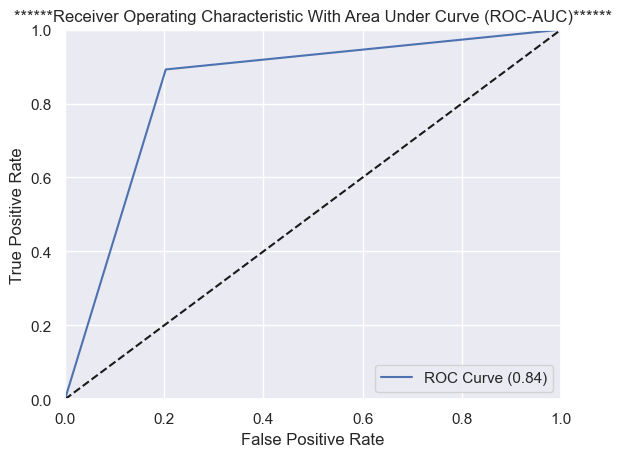

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()